# ANN Regression

## Import Packages

In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# make a random dataset
N = 1000
#generate uniformally distributed random numbers between -3 and 3 [NX2 array]
X = np.random.random((N, 2))*6 -3 
Y = np.cos(2*X[:,0]) + np.cos(3*X[:,1]) # implements y = cos(2xi) + cos(3xi)

In [5]:
Y.shape

(1000,)

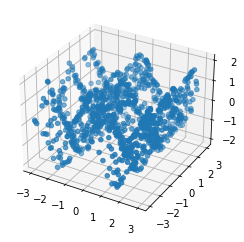

In [10]:
# plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0],X[:,1],Y);

## Build Model

In [11]:

# since we are doing regression, no output activation 
model = nn.Sequential(
        nn.Linear(2,128),
        nn.ReLU(),
        nn.Linear(128,1)
)

In [12]:
# loss and optimizer 
criterion = nn.MSELoss() # MSE loss for regression
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

## Train

In [33]:
# Create a training function
def full_gd(model,criterion,optimizer,X_train,Y_train,epochs=1000):
    train_losses = np.zeros(epochs)

    for it in range(epochs):
        optimizer.zero_grad()

        outputs = model(X_train)
        loss = criterion(outputs, Y_train)

        loss.backward()
        optimizer.step()

        train_losses[it] = loss.item()

        if (it + 1) % 50 == 0:
            print(f'Epoch {it+1}/{epochs}, Train Loss: {loss.item():.4f}')

    return train_losses


In [34]:
X_train = torch.from_numpy(X.astype(np.float32))
y_train = torch.from_numpy(Y.astype(np.float32)).reshape(-1,1) # convert tom float 32 and 2d

In [35]:
train_losses = full_gd(model,criterion,optimizer,X_train,y_train)

Epoch 50/1000, Train Loss: 0.3875
Epoch 100/1000, Train Loss: 0.3049
Epoch 150/1000, Train Loss: 0.1653
Epoch 200/1000, Train Loss: 0.0359
Epoch 250/1000, Train Loss: 0.0106
Epoch 300/1000, Train Loss: 0.0062
Epoch 350/1000, Train Loss: 0.0042
Epoch 400/1000, Train Loss: 0.0033
Epoch 450/1000, Train Loss: 0.0053
Epoch 500/1000, Train Loss: 0.0027
Epoch 550/1000, Train Loss: 0.0025
Epoch 600/1000, Train Loss: 0.0028
Epoch 650/1000, Train Loss: 0.0024
Epoch 700/1000, Train Loss: 0.0022
Epoch 750/1000, Train Loss: 0.0021
Epoch 800/1000, Train Loss: 0.0299
Epoch 850/1000, Train Loss: 0.0020
Epoch 900/1000, Train Loss: 0.0018
Epoch 950/1000, Train Loss: 0.0018
Epoch 1000/1000, Train Loss: 0.0031


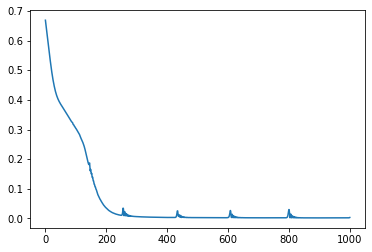

In [37]:
plt.plot(train_losses);

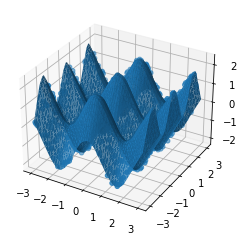

In [38]:
# Plot the prediction surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y)

# surface plot
with torch.no_grad():
  line = np.linspace(-3, 3, 50)
  xx, yy = np.meshgrid(line, line)
  Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
  Xgrid_torch = torch.from_numpy(Xgrid.astype(np.float32))
  Yhat = model(Xgrid_torch).numpy().flatten()
  ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Yhat, linewidth=0.2, antialiased=True)
  plt.show()